In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## Getting final merged data

In [77]:
#read final merged data 
final_data_single_family_sold = pd.read_csv('/Users/hp/Projects/zillow/Zillow/single_family_sold_normalized_price_outlier_removed.csv')



## Data Exploration

Data Exploration is the key to getting insights from data. Practitioners say a good data exploration strategy can solve even complicated problems in a few hours. A good data exploration strategy comprises the following:

--- Univariate Analysis - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.

--- Bivariate Analysis - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.

--- Multivariate Analysis - As the name suggests, it is used to visualize more than two variables at once. Examples: stacked bar chart, dodged bar chart, etc.

--- Cross Tables -They are used to compare the behavior of two categorical variables (used in pivot tables as well).

In [78]:
final_data_single_family_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 27 columns):
Unnamed: 0          9986 non-null int64
latitude            9986 non-null float64
longitude           9986 non-null float64
address             9986 non-null object
city                9986 non-null object
state               9986 non-null object
zip                 9986 non-null int64
bedrooms            9982 non-null float64
bathrooms           9939 non-null float64
sqft                9956 non-null float64
lot_size            9960 non-null float64
year_built          9953 non-null float64
price               9986 non-null float64
sale_type           9986 non-null object
zestimate           9974 non-null float64
date_sold           9986 non-null object
days_on_zillow      71 non-null float64
house_type          9986 non-null object
url                 9986 non-null object
Parcel_Number       9986 non-null int64
Liquefaction        9986 non-null float64
Landslide           9986 n

In [79]:
#changing date into datetime type and fire hazard type into int
final_data_single_family_sold['date_sold'] = pd.to_datetime(final_data_single_family_sold['date_sold'])


In [80]:
final_data_single_family_sold.columns[final_data_single_family_sold.isnull().any()]

Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'year_built', 'zestimate',
       'days_on_zillow', 'normalized_perc'],
      dtype='object')

In [81]:
#missing value counts in each of these columns
total = final_data_single_family_sold.isnull().sum().sort_values(ascending=False)
percent = (final_data_single_family_sold.isnull().sum()/final_data_single_family_sold.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total']>0]
missing_data


,Total,Percent
days_on_zillow,9915,0.992890
bathrooms,47,0.004707
year_built,33,0.003305
sqft,30,0.003004
lot_size,26,0.002604
normalized_perc,12,0.001202
zestimate,12,0.001202
bedrooms,4,0.000401


Text(0.5, 1.0, 'Percent missing data by feature')

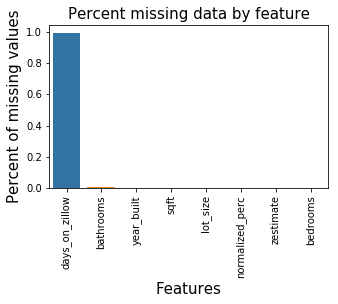

In [82]:
#visualising missing values
f, ax = plt.subplots(figsize=(5, 3))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [83]:
final_data_single_family_sold['year_built'].describe()

count    9953.000000
mean     1966.659902
std        22.246766
min      1868.000000
25%      1958.000000
50%      1967.000000
75%      1978.000000
max      2019.000000
Name: year_built, dtype: float64

In [84]:
final_data_single_family_sold['bedrooms'].describe()

count    9982.000000
mean        3.501202
std         0.887268
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

In [85]:
final_data_single_family_sold['bathrooms'].describe()

count    9939.000000
mean        2.325687
std         0.801817
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: bathrooms, dtype: float64

In [86]:
# filling year_built column with median value 
final_data_single_family_sold['year_built'].fillna(final_data_single_family_sold['year_built'].median(), inplace=True)

In [87]:
final_data_single_family_sold['year_built'].isnull().nunique()

1

In [88]:
#deleting bedrooms equal to zero
final_data_single_family_sold = final_data_single_family_sold[final_data_single_family_sold['bedrooms']>0]

In [89]:
#checking missing values in bedrooms,bathrooms and sqft
sd = final_data_single_family_sold[final_data_single_family_sold['bedrooms'].isnull() & final_data_single_family_sold['bathrooms'].isnull() & final_data_single_family_sold['sqft'].isnull()]
sd


,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc


In [90]:
gh = final_data_single_family_sold[final_data_single_family_sold['sqft'].isnull() & final_data_single_family_sold['lot_size'].isnull()]
gh

,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc


In [91]:
#deleting missing sqft
final_data_single_family_sold.dropna(subset=['sqft'], inplace=True)

In [92]:
final_data_single_family_sold=final_data_single_family_sold.sort_values(by=['sqft'])


In [93]:
final_data_single_family_sold[['bedrooms','bathrooms']] = final_data_single_family_sold[['bedrooms','bathrooms']].fillna(method='ffill')
final_data_single_family_sold

,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
6385,8873,37.366249,-121.824188,106 MILLAR AVE,SAN JOSE,CA,95127,2.0,1.0,414.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,60121021,0.0,0.0,0,0,667000.0,35970.0,5.700204
6010,8282,37.354789,-121.876742,1011 E EMPIRE ST,SAN JOSE,CA,95112,1.0,1.0,440.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,24923003,1.0,0.0,0,0,579500.0,72067.0,11.060566
5794,7855,37.343642,-121.880351,126 N 12TH ST,SAN JOSE,CA,95112,1.0,1.0,484.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,46716095,1.0,0.0,0,0,550000.0,144366.0,20.791053
5760,7766,37.263644,-121.940646,3462 WINE CASK WAY,SAN JOSE,CA,95124,1.0,1.0,500.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,41431089,0.0,0.0,0,0,530000.0,59233.0,10.052560
8187,11387,37.319866,-121.886592,856 PALM ST,SAN JOSE,CA,95110,2.0,1.0,520.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,26439151,1.0,0.0,0,0,850000.0,86628.0,11.348071
6024,8305,37.322447,-121.929595,351 ARLETA AVE,SAN JOSE,CA,95128,2.0,1.5,544.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,27707034,0.0,0.0,0,0,611000.0,357254.0,36.896723
5632,7265,37.346887,-121.862408,1364 E SAN FERNANDO ST,SAN JOSE,CA,95116,2.0,1.0,544.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,46734057,1.0,0.0,0,0,410000.0,229729.0,35.910362
5630,7250,37.355384,-121.848477,46 S SUNSET AVE,SAN JOSE,CA,95116,1.0,1.0,552.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,48121007,1.0,0.0,0,0,404000.0,77980.0,16.179095
6209,8620,37.322076,-121.925229,379 CLIFTON AVE,SAN JOSE,CA,95128,2.0,1.0,576.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,27712035,0.0,0.0,0,0,650000.0,153916.0,19.145781
5665,7466,37.428164,-121.972772,1297 STATE ST,SAN JOSE,CA,95002,1.0,1.0,584.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,1512097,1.0,0.0,0,0,470000.0,158810.0,25.255642


In [94]:
# filling lot_size column with median value 
final_data_single_family_sold['lot_size'].fillna(final_data_single_family_sold['lot_size'].median(), inplace=True)

In [95]:
final_data_single_family_sold['year_built'] = final_data_single_family_sold['year_built'].astype(int)

In [96]:
import math
import time

date_sold_month = []
date_sold_year = []

for index, row in final_data_single_family_sold.iterrows():

    dat_str = str(row['date_sold'])
    if dat_str == 'NaT':
        date_sold_month.append(float('nan'))
        date_sold_year.append(float('nan'))
    else:
        yymmdd,seconds = dat_str.split(' ')
        yy,mm,dd = dat_str.split('-')
        date_sold_month.append(mm)
        date_sold_year.append(yy)


final_data_single_family_sold['date_sold_month'] = date_sold_month
final_data_single_family_sold['date_sold_year'] = date_sold_year


In [97]:
final_data_single_family_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9943 entries, 6385 to 5623
Data columns (total 29 columns):
Unnamed: 0          9943 non-null int64
latitude            9943 non-null float64
longitude           9943 non-null float64
address             9943 non-null object
city                9943 non-null object
state               9943 non-null object
zip                 9943 non-null int64
bedrooms            9943 non-null float64
bathrooms           9943 non-null float64
sqft                9943 non-null float64
lot_size            9943 non-null float64
year_built          9943 non-null int64
price               9943 non-null float64
sale_type           9943 non-null object
zestimate           9933 non-null float64
date_sold           9943 non-null datetime64[ns]
days_on_zillow      71 non-null float64
house_type          9943 non-null object
url                 9943 non-null object
Parcel_Number       9943 non-null int64
Liquefaction        9943 non-null float64
Landslide        

In [98]:
final_data_single_family_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/single_family_sold_for_model.csv')


In [99]:
final_data_single_family_sold.shape

(9943, 29)

In [100]:
#missing value counts in each of these columns
total = final_data_single_family_sold.isnull().sum().sort_values(ascending=False)
percent = (final_data_single_family_sold.isnull().sum()/final_data_single_family_sold.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
days_on_zillow,9872,0.992859
zestimate,10,0.001006
normalized_perc,10,0.001006


In [101]:
final_data_single_family_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9943 entries, 6385 to 5623
Data columns (total 29 columns):
Unnamed: 0          9943 non-null int64
latitude            9943 non-null float64
longitude           9943 non-null float64
address             9943 non-null object
city                9943 non-null object
state               9943 non-null object
zip                 9943 non-null int64
bedrooms            9943 non-null float64
bathrooms           9943 non-null float64
sqft                9943 non-null float64
lot_size            9943 non-null float64
year_built          9943 non-null int64
price               9943 non-null float64
sale_type           9943 non-null object
zestimate           9933 non-null float64
date_sold           9943 non-null datetime64[ns]
days_on_zillow      71 non-null float64
house_type          9943 non-null object
url                 9943 non-null object
Parcel_Number       9943 non-null int64
Liquefaction        9943 non-null float64
Landslide        

In [102]:
%matplotlib inline
import folium
import webbrowser
from mpl_toolkits.basemap import Basemap

In [103]:
def generateBaseMap(default_location=[37.335480, -121.893028], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [104]:
li=final_data_single_family_sold[final_data_single_family_sold['Liquefaction']==1]
la=final_data_single_family_sold[final_data_single_family_sold['Landslide']==1]
fa=final_data_single_family_sold[final_data_single_family_sold['Faultzone']==1]
li_la_fa = final_data_single_family_sold[(final_data_single_family_sold['Faultzone']==1)&(final_data_single_family_sold['Liquefaction']==1)&(final_data_single_family_sold['Landslide']==1)]


len(li_la_fa)

0

In [105]:
base_map_fault=generateBaseMap()

i = 1
for lat, lon in zip(fa['latitude'],fa['longitude']):
    if (i < len(fa)):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='black', fill=True).add_to(base_map_fault)
base_map_fault

In [106]:
base_map_landslide=generateBaseMap()

i = 1
for lat, lon in zip(la['latitude'],la['longitude']):
    if (i < len(la)):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='green', fill=True).add_to(base_map_landslide)
base_map_landslide

In [107]:
base_map_liquefaction=generateBaseMap()

i = 1
for lat, lon in zip(li['latitude'],li['longitude']):
    if (i < 3000):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='blue', fill=True).add_to(base_map_liquefaction)
base_map_liquefaction

## Which is the most common house (Bedroom wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

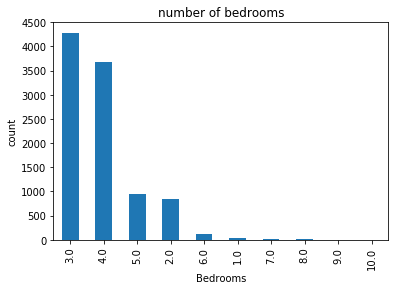

In [108]:
final_data_single_family_sold['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

## Which is the most common house (Bathrooms wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

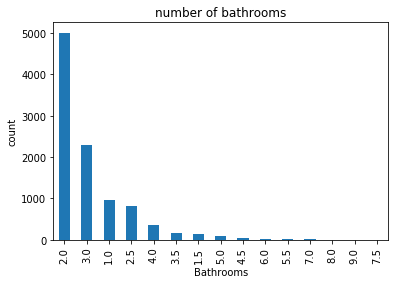

In [109]:
final_data_single_family_sold['bathrooms'].value_counts().plot(kind='bar')
plt.title('number of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('count')
sns.despine

## Which is the most sold house (Zip wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

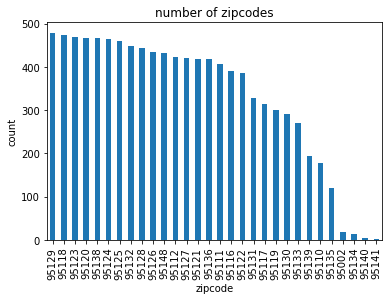

In [110]:
final_data_single_family_sold['zip'].value_counts().plot(kind='bar')
plt.title('number of zipcodes')
plt.xlabel('zipcode')
plt.ylabel('count')
sns.despine

In [111]:
final_data_single_family_sold.normalized_price.describe()

count    9.943000e+03
mean     1.139919e+06
std      4.369705e+05
min      3.100000e+05
25%      8.318940e+05
50%      1.050000e+06
75%      1.350000e+06
max      5.500000e+06
Name: normalized_price, dtype: float64

In [112]:
max(final_data_single_family_sold.normalized_price)

5500000.0

In [113]:
min(final_data_single_family_sold.normalized_price)

310000.0

final_data_single_family_sold.groupby('zip')['normalized_price'].mean().plot.bar(figsize=(10,10))
plt.ylabel('Average Price')
plt.title('Average Price of House in different Zipcodes')
plt.tight_layout()


In [114]:
#to work with price group, create a list of price group to use as a bins
#create a new column with column label 'price_bin'
bins = [300000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1400000,1500000,1600000,2000000,3000000,4000000,5000000,6000000]
final_data_single_family_sold['price_bin']= pd.cut(final_data_single_family_sold['normalized_price'], bins)


In [115]:
# check how many houses belong to different price range
final_data_single_family_sold.price_bin.value_counts().sort_index()

(300000, 500000]        96
(500000, 600000]       269
(600000, 700000]       699
(700000, 800000]      1077
(800000, 900000]      1246
(900000, 1000000]     1213
(1000000, 1100000]     943
(1100000, 1200000]     896
(1200000, 1400000]    1348
(1400000, 1500000]     479
(1500000, 1600000]     393
(1600000, 2000000]     855
(2000000, 3000000]     395
(3000000, 4000000]      25
(4000000, 5000000]       8
(5000000, 6000000]       1
Name: price_bin, dtype: int64

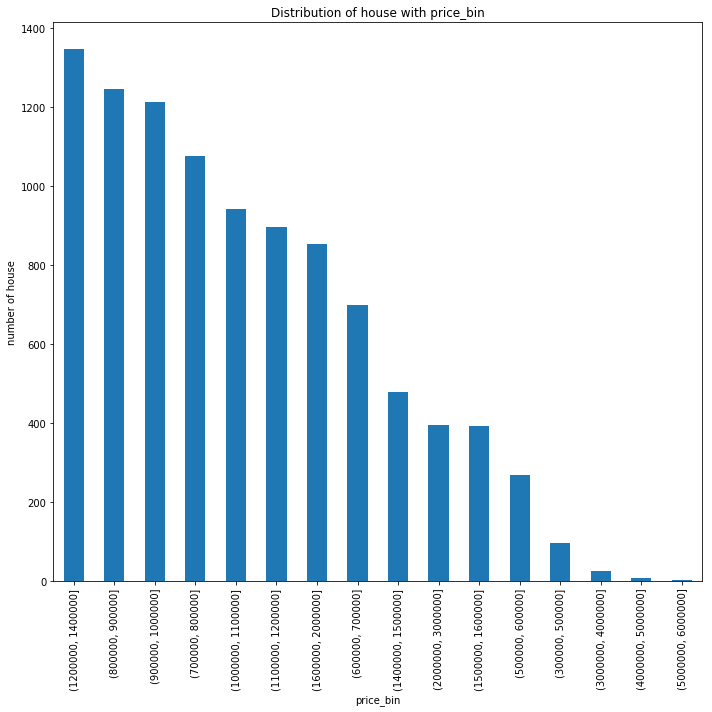

In [116]:
# Most of the house are priced 1.0M to 1.1M
# There are only 5 houses which has price less than 400,000
# There are 3 houses which has price 4M to 6M
final_data_single_family_sold.price_bin.value_counts().plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.xlabel('price_bin')
plt.title('Distribution of house with price_bin')
plt.tight_layout()


In [117]:
final_data_single_family_sold[['price','normalized_price','zestimate','price_bin']].head()

,price,normalized_price,zestimate,price_bin
6385,667000.0,667000.0,631030.0,"(600000, 700000]"
6010,610000.0,579500.0,651567.0,"(500000, 600000]"
5794,550000.0,550000.0,694366.0,"(500000, 600000]"
5760,530000.0,530000.0,589233.0,"(500000, 600000]"
8187,850000.0,850000.0,763372.0,"(800000, 900000]"


In [118]:
group_price = final_data_single_family_sold.groupby('price_bin').median()
group_price[['bedrooms','bathrooms','sqft','year_built','zip','zestimate','price','normalized_price','Liquefaction','Landslide','Faultzone','fire_hazard',]]
             
             

,bedrooms,bathrooms,sqft,year_built,zip,zestimate,price,normalized_price,Liquefaction,Landslide,Faultzone,fire_hazard
price_bin,,,,,,,,,,,,
"(300000, 500000]",2.0,1.0,1029.0,1959.0,95116.0,657688.5,476000.0,470044.0,1.0,0.0,0.0,0.0
"(500000, 600000]",3.0,2.0,1100.0,1959.0,95119.0,716528.0,570000.0,565250.0,1.0,0.0,0.0,0.0
"(600000, 700000]",3.0,2.0,1187.0,1960.0,95121.0,749880.0,668000.0,658000.0,1.0,0.0,0.0,0.0
"(700000, 800000]",3.0,2.0,1296.0,1966.0,95122.0,821017.5,760000.0,752000.0,1.0,0.0,0.0,0.0
"(800000, 900000]",3.0,2.0,1432.0,1970.0,95124.0,907080.0,860000.0,855000.0,1.0,0.0,0.0,0.0
"(900000, 1000000]",3.0,2.0,1557.0,1970.0,95126.0,1010847.0,960000.0,950000.0,1.0,0.0,0.0,0.0
"(1000000, 1100000]",3.0,2.0,1618.0,1969.0,95126.0,1090011.0,1070000.0,1053000.0,1.0,0.0,0.0,0.0
"(1100000, 1200000]",4.0,2.0,1650.0,1968.0,95126.0,1161897.0,1171000.0,1155000.0,0.0,0.0,0.0,0.0
"(1200000, 1400000]",4.0,2.0,1779.5,1964.0,95126.0,1299521.0,1310000.0,1300000.0,0.0,0.0,0.0,0.0


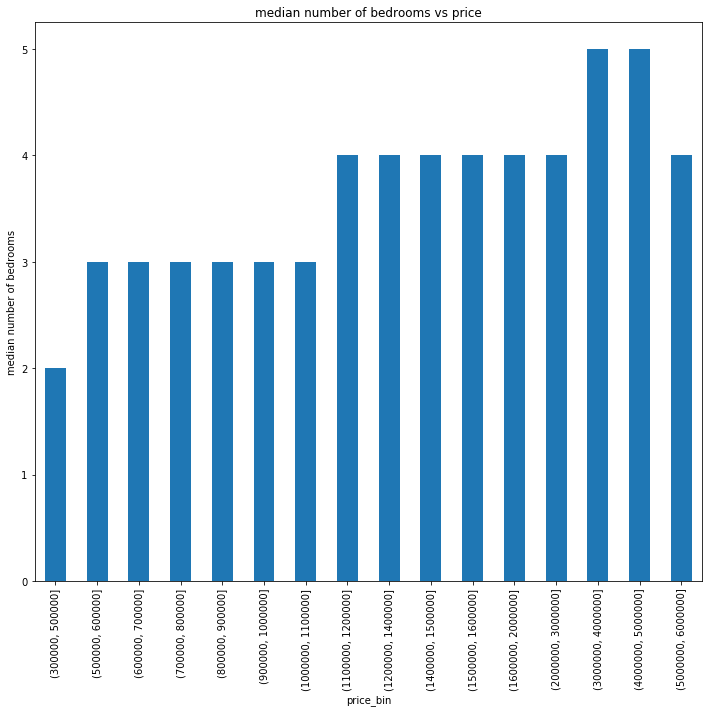

In [119]:
# Houses 4,000,000 to 5,000,000 has median 5 bedrooms
# Houses priced less than 400,000 has median 2 bedrooms
# Houses with more bedrooms are more expensive
# Houses with less bedrooms are less expensive
group_price.bedrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bedrooms')
plt.title('median number of bedrooms vs price')
plt.tight_layout()


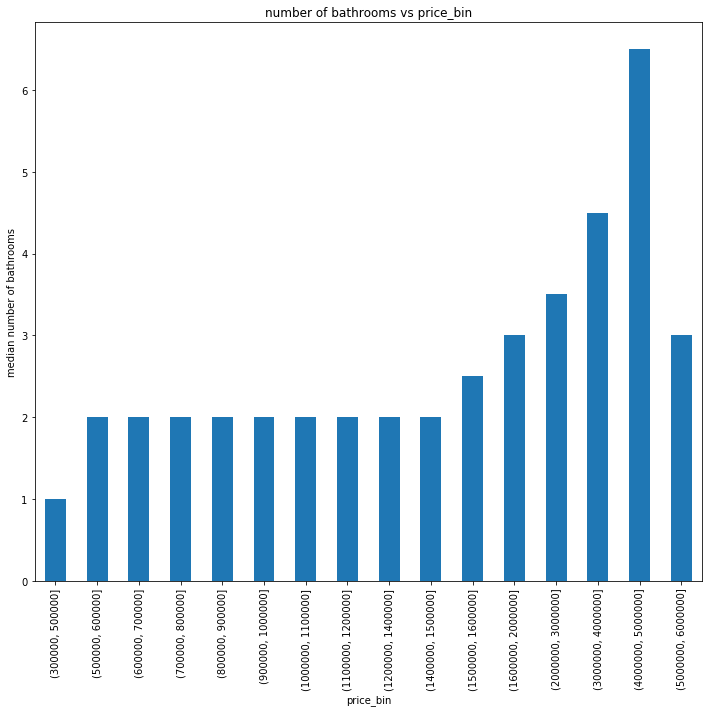

In [120]:
 # Houses 4,000,000 to 6,000,000 has median 5 bathrooms
# Houses priced less than 400,000 has median 1 bathroom
# Houses with more bathrooms are more expensive
# Houses with less bathrooms are less expensive
group_price.bathrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bathrooms')
plt.title('number of bathrooms vs price_bin')
plt.tight_layout()


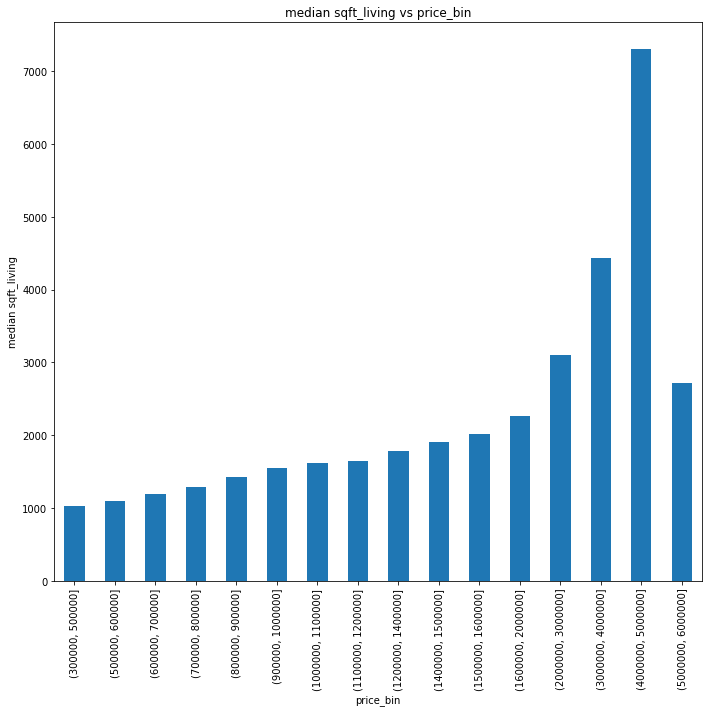

In [121]:
# Houses with larger sqft_living are more expensive
# Houses with less sqft_living are less expensive
group_price.sqft.plot.bar(figsize=(10,10))
plt.ylabel('median sqft_living')
plt.title('median sqft_living vs price_bin')
plt.tight_layout()


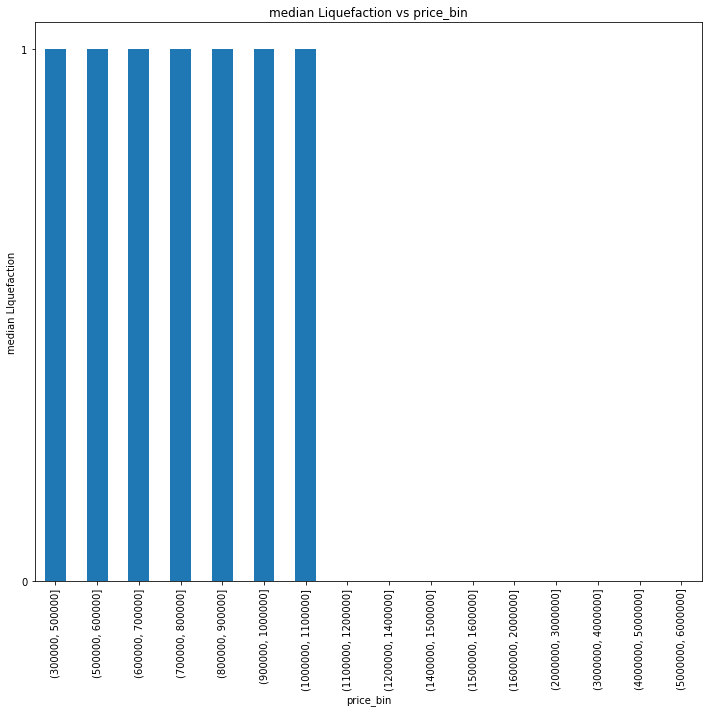

In [122]:

group_price.Liquefaction.plot.bar(figsize=(10,10))
plt.ylabel('median LIquefaction')
plt.title('median Liquefaction vs price_bin')
plt.yticks([0,1])
plt.tight_layout()


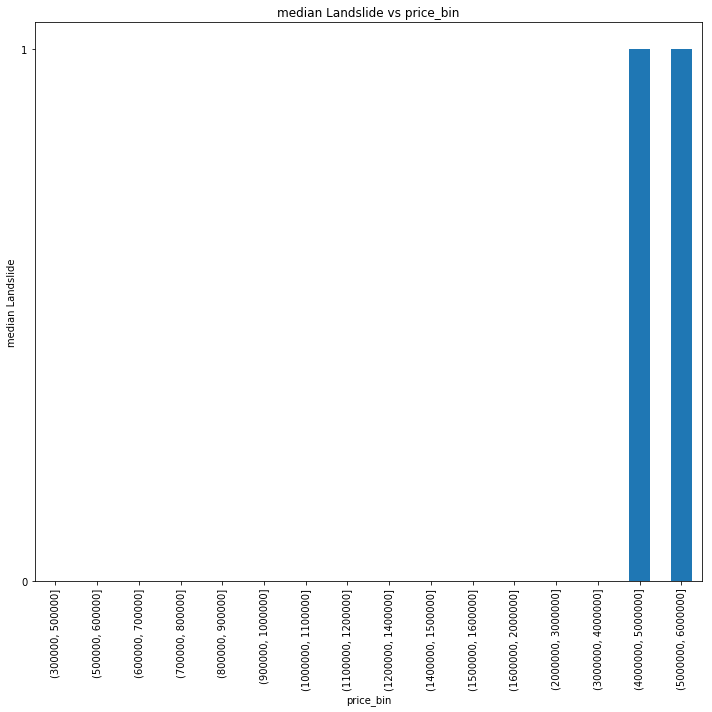

In [123]:
group_price.Landslide.plot.bar(figsize=(10,10))
plt.ylabel('median Landslide')
plt.title('median Landslide vs price_bin')
plt.yticks([0,1])
plt.tight_layout()

## Which is the most common house (year built) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

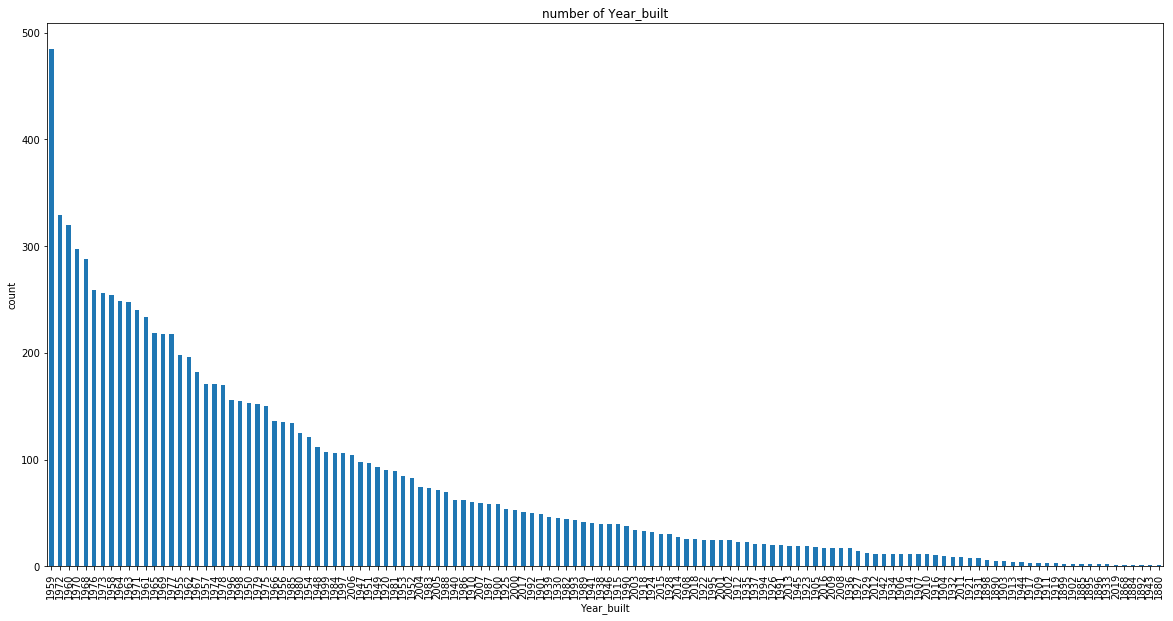

In [124]:
plt.figure(figsize=(20,10))
final_data_single_family_sold['year_built'].value_counts().plot(kind='bar')
plt.title('number of Year_built')
plt.xlabel('Year_built')
plt.ylabel('count')
plt.xticks(rotation=90)
sns.despine

## Which is the most common hazard ?

/Users/hp/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


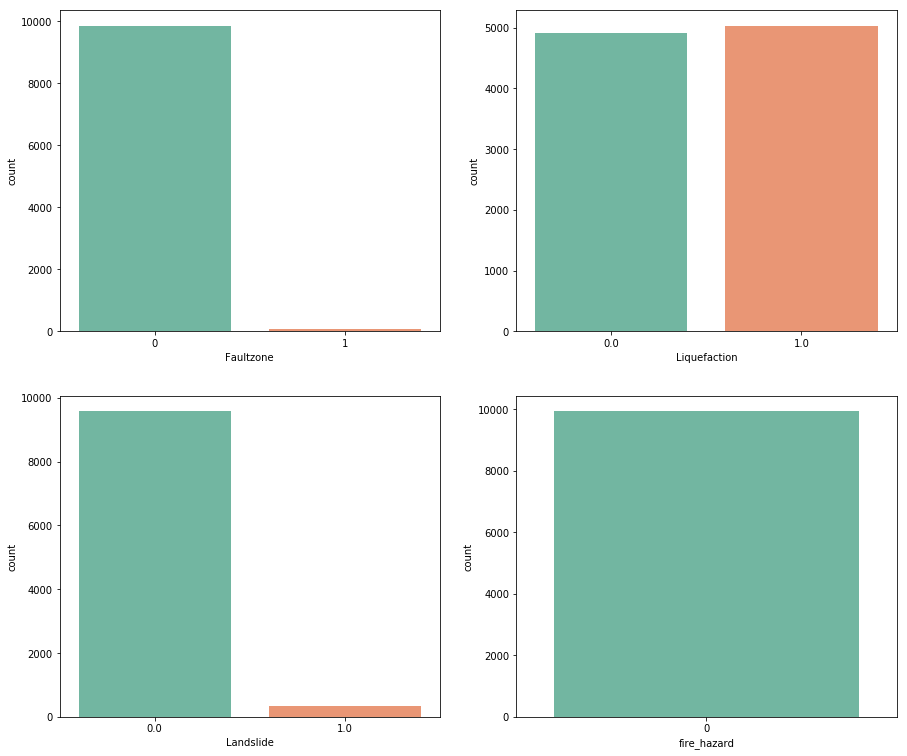

In [125]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey=False, figsize=(15,13))
g =sns.countplot(x="Faultzone", data=final_data_single_family_sold, palette="Set2",ax=axes[0][0])
g =sns.countplot(x="Liquefaction", data=final_data_single_family_sold, palette="Set2",ax=axes[0][1])
g =sns.countplot(x="Landslide", data=final_data_single_family_sold, palette="Set2",ax=axes[1][0])
g =sns.countplot(x="fire_hazard", data=final_data_single_family_sold, palette="Set2",ax=axes[1][1])
fig.show()


## which month is best for selling house?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

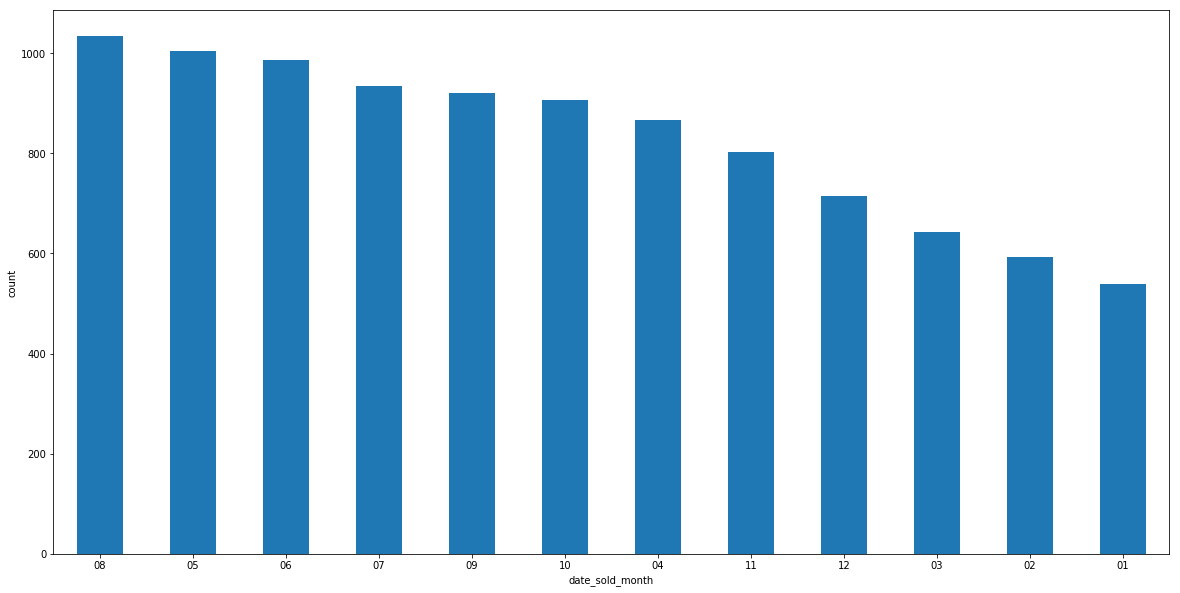

In [126]:
plt.figure(figsize=(20,10))
final_data_single_family_sold['date_sold_month'].value_counts().plot(kind='bar')
plt.xlabel('date_sold_month')
plt.ylabel('count')
plt.xticks(rotation=0)
sns.despine

## which year has most house solded?

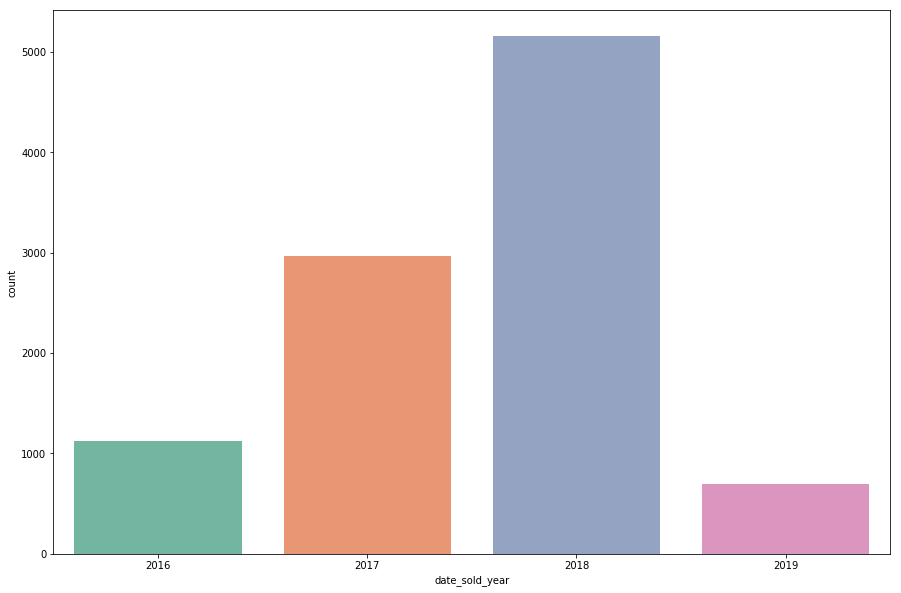

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(x="date_sold_year", data=final_data_single_family_sold, palette="Set2")

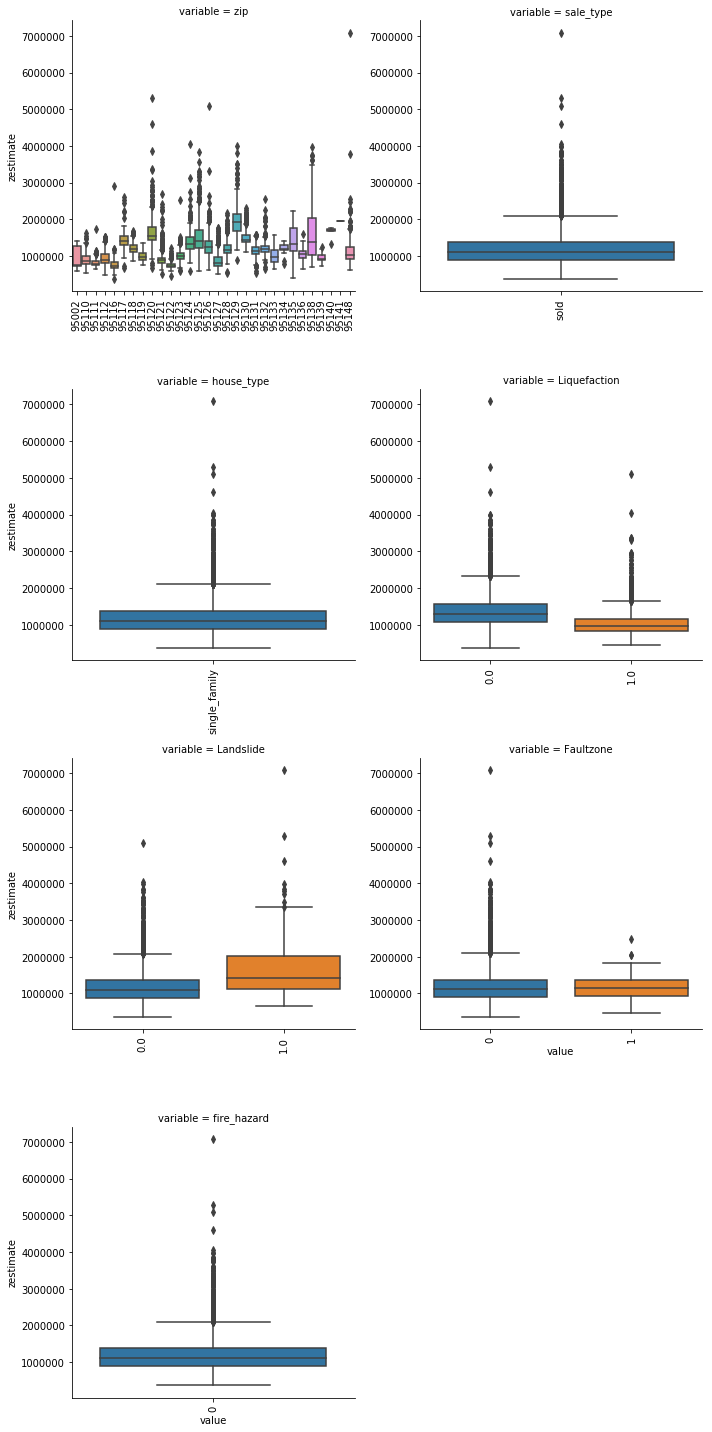

In [128]:
#qualitative = [f for f in final_data_single_family_sold.columns if final_data_single_family_sold.dtypes[f] == 'object']
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_single_family_sold, id_vars=['zestimate'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "zestimate")


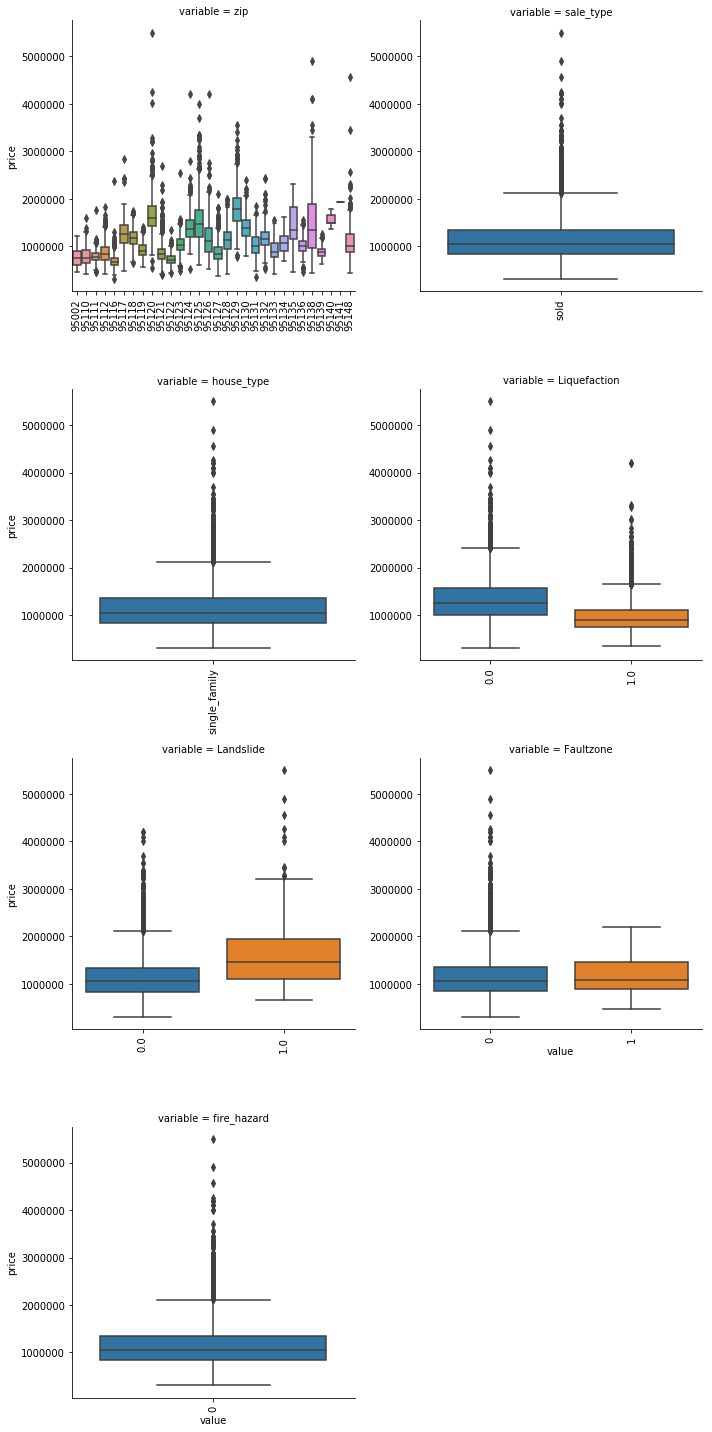

In [129]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_single_family_sold, id_vars=['price'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "price")


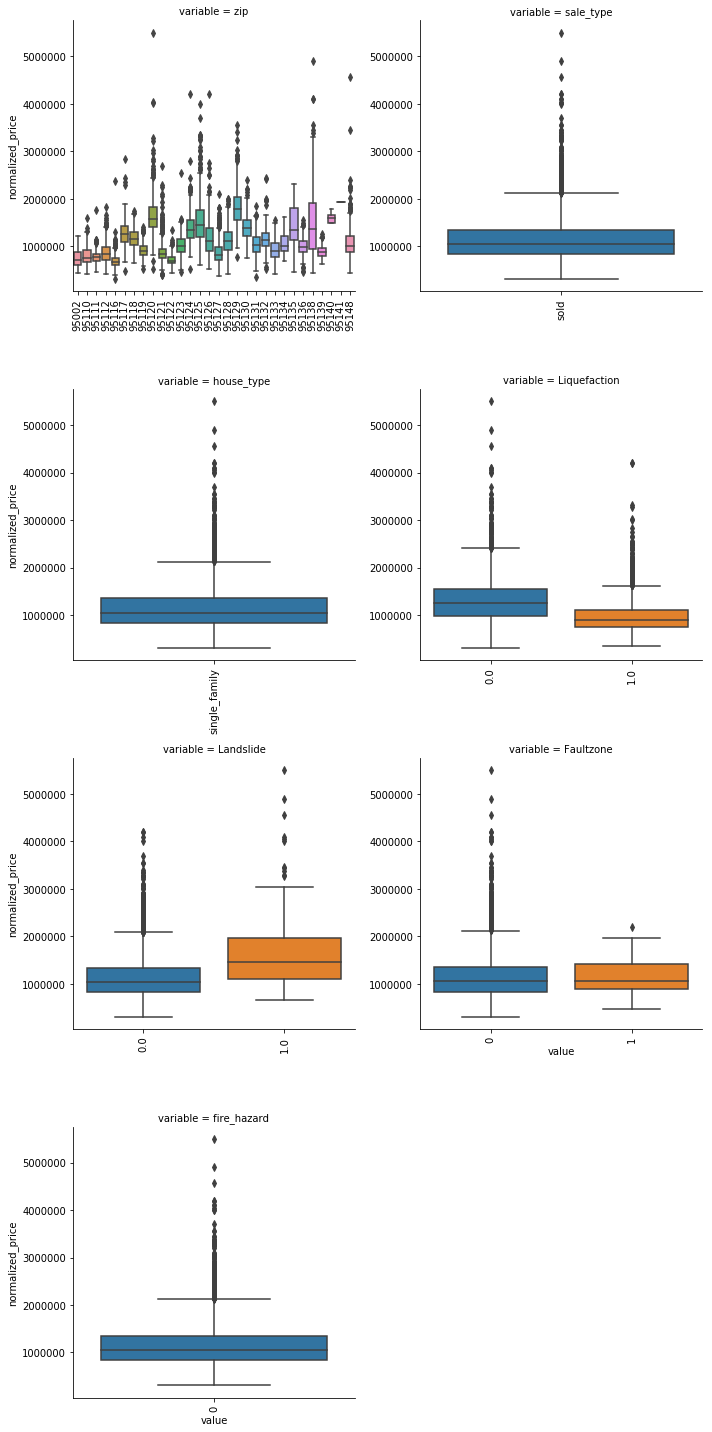

In [130]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_single_family_sold, id_vars=['normalized_price'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "normalized_price")


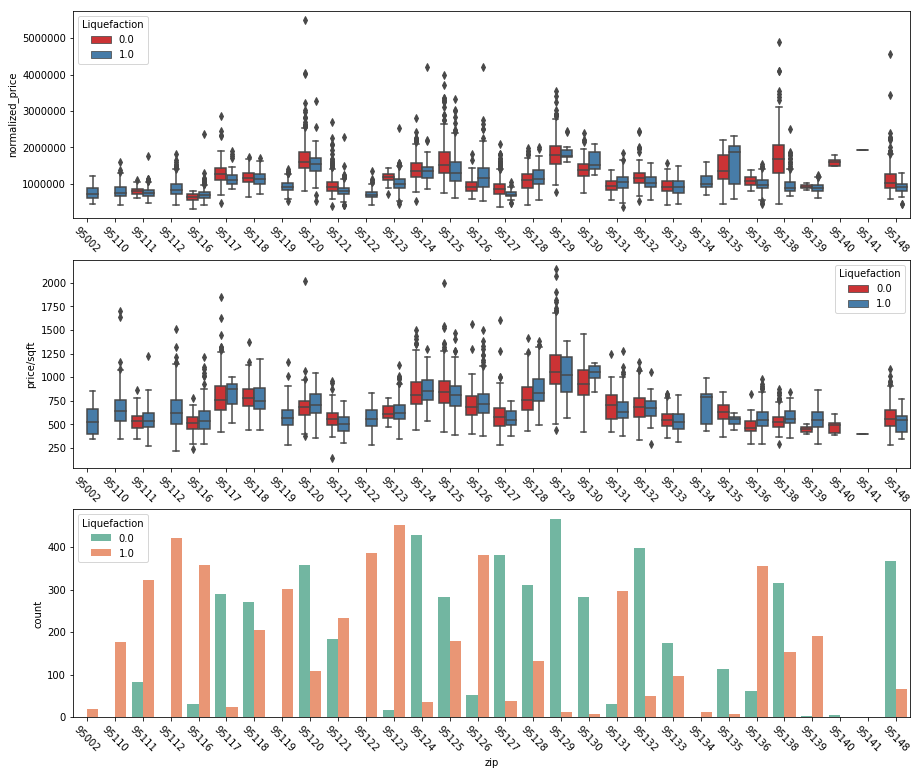

In [131]:
# library and dataset
import seaborn as sns

er = final_data_single_family_sold
er['price/sqft'] = final_data_single_family_sold['normalized_price']/final_data_single_family_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Liquefaction", data=final_data_single_family_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Liquefaction", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Liquefaction", data=final_data_single_family_sold, palette="Set2",ax=axes[2])



In [132]:
he =final_data_single_family_sold[(final_data_single_family_sold['zip']==95116) & (final_data_single_family_sold['Liquefaction']==1)]
be = final_data_single_family_sold[(final_data_single_family_sold['zip']==95127) & (final_data_single_family_sold['Liquefaction']==0)]



In [133]:
he['normalized_price'].describe()

count    3.590000e+02
mean     7.087976e+05
std      1.646020e+05
min      4.040000e+05
25%      6.150000e+05
50%      6.800000e+05
75%      7.635000e+05
max      2.380000e+06
Name: normalized_price, dtype: float64

In [134]:
be['normalized_price'].describe()

count    3.820000e+02
mean     8.955994e+05
std      2.555363e+05
min      3.755000e+05
25%      7.300000e+05
50%      8.455300e+05
75%      1.000000e+06
max      2.100000e+06
Name: normalized_price, dtype: float64

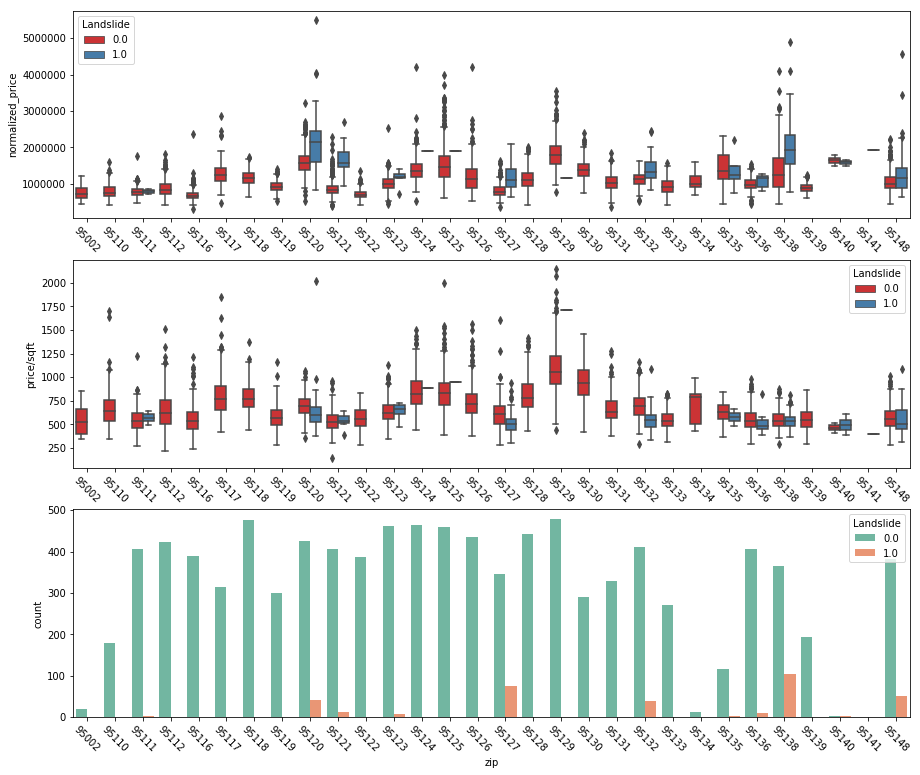

In [135]:
# library and dataset
import seaborn as sns

er = final_data_single_family_sold
er['price/sqft'] = final_data_single_family_sold['normalized_price']/final_data_single_family_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Landslide", data=final_data_single_family_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Landslide", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Landslide", data=final_data_single_family_sold, palette="Set2",ax=axes[2])






In [136]:
df =final_data_single_family_sold[(final_data_single_family_sold['zip']==95135) & (final_data_single_family_sold['Landslide']==0)]
cd = final_data_single_family_sold[(final_data_single_family_sold['zip']==95138) & (final_data_single_family_sold['Landslide']==1)]

In [137]:
df['normalized_price'].describe()

count    1.160000e+02
mean     1.390927e+06
std      4.586167e+05
min      4.500000e+05
25%      1.139000e+06
50%      1.347500e+06
75%      1.800000e+06
max      2.317000e+06
Name: normalized_price, dtype: float64

In [138]:
cd['normalized_price'].describe()

count    1.040000e+02
mean     1.957905e+06
std      6.763002e+05
min      7.800000e+05
25%      1.530000e+06
50%      1.921725e+06
75%      2.337500e+06
max      4.900000e+06
Name: normalized_price, dtype: float64

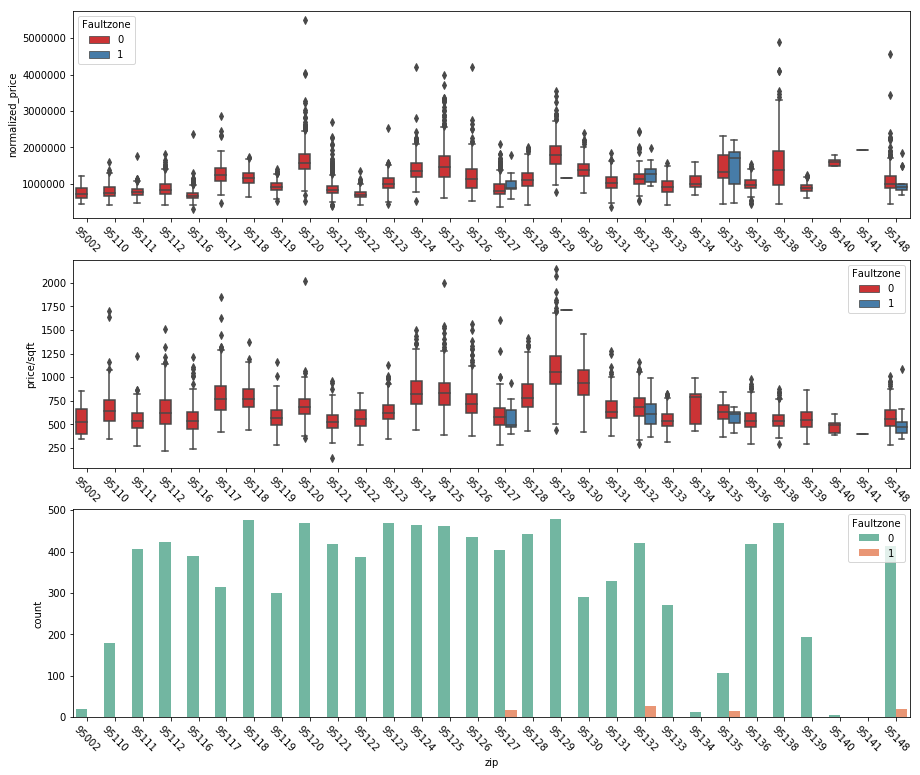

In [139]:
# library and dataset
import seaborn as sns

er = final_data_single_family_sold
er['price/sqft'] = final_data_single_family_sold['normalized_price']/final_data_single_family_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Faultzone", data=final_data_single_family_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Faultzone", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Faultzone", data=final_data_single_family_sold, palette="Set2",ax=axes[2])


In [140]:
uj =final_data_single_family_sold[(final_data_single_family_sold['zip']==95140) & (final_data_single_family_sold['Faultzone']==0)]
io = final_data_single_family_sold[(final_data_single_family_sold['zip']==95127) & (final_data_single_family_sold['Faultzone']==1)]

In [141]:
uj['normalized_price'].describe()

count    5.000000e+00
mean     1.604240e+06
std      1.171405e+05
min      1.500000e+06
25%      1.500000e+06
50%      1.591200e+06
75%      1.650000e+06
max      1.780000e+06
Name: normalized_price, dtype: float64

In [142]:
io['normalized_price'].describe()

count    1.700000e+01
mean     9.803271e+05
std      2.765101e+05
min      5.750000e+05
25%      8.460000e+05
50%      8.840000e+05
75%      1.070000e+06
max      1.800000e+06
Name: normalized_price, dtype: float64

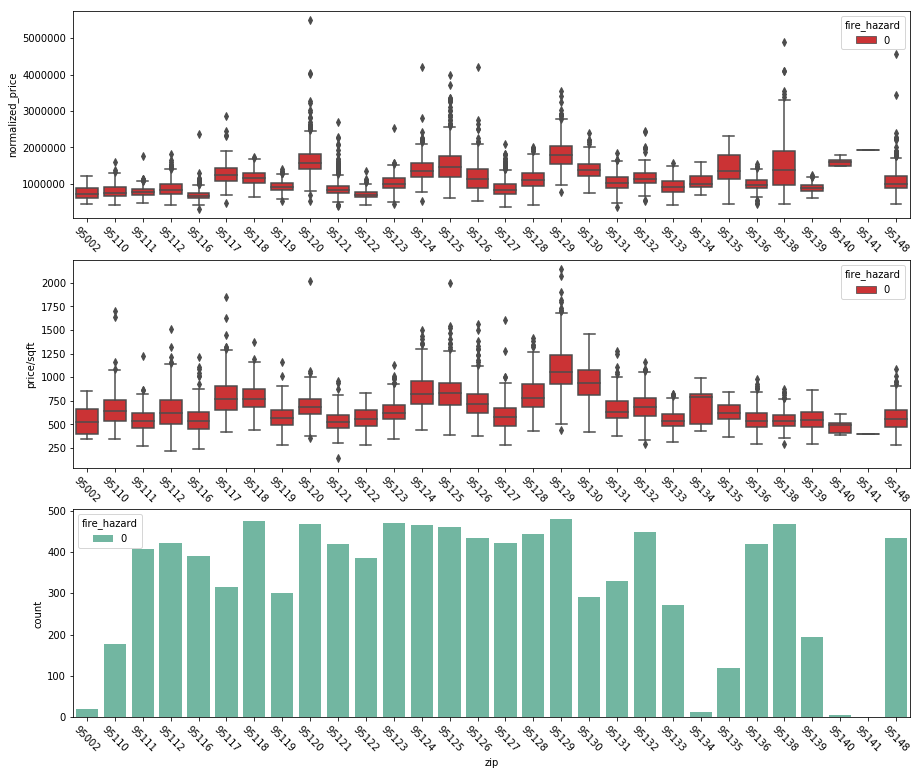

In [143]:
# library and dataset
import seaborn as sns

er = final_data_single_family_sold
er['price/sqft'] = final_data_single_family_sold['normalized_price']/final_data_single_family_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="fire_hazard", data=final_data_single_family_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="fire_hazard", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="fire_hazard", data=final_data_single_family_sold, palette="Set2",ax=axes[2])


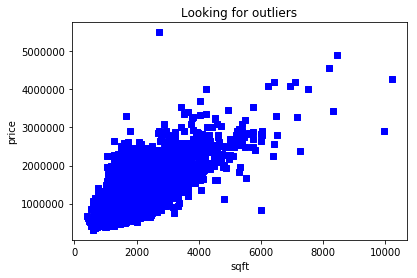

In [144]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(final_data_single_family_sold.sqft, final_data_single_family_sold.price, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()



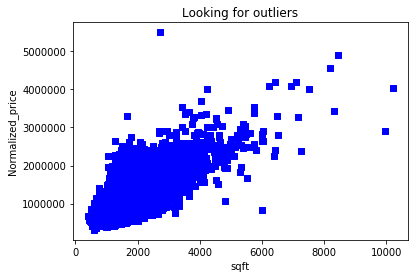

In [145]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(final_data_single_family_sold.sqft, final_data_single_family_sold.normalized_price, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("sqft")
plt.ylabel("Normalized_price")
plt.show()


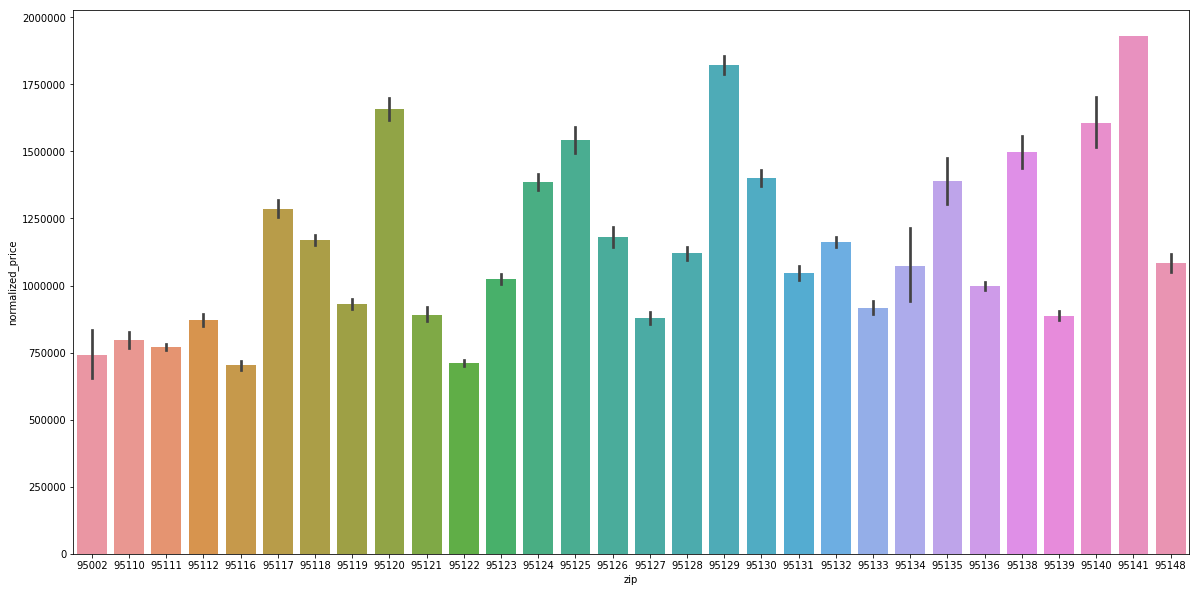

In [146]:
plt.figure(figsize=(20,10))
sns.barplot(final_data_single_family_sold.zip,final_data_single_family_sold.normalized_price)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 <a list of 130 Text xticklabel objects>)

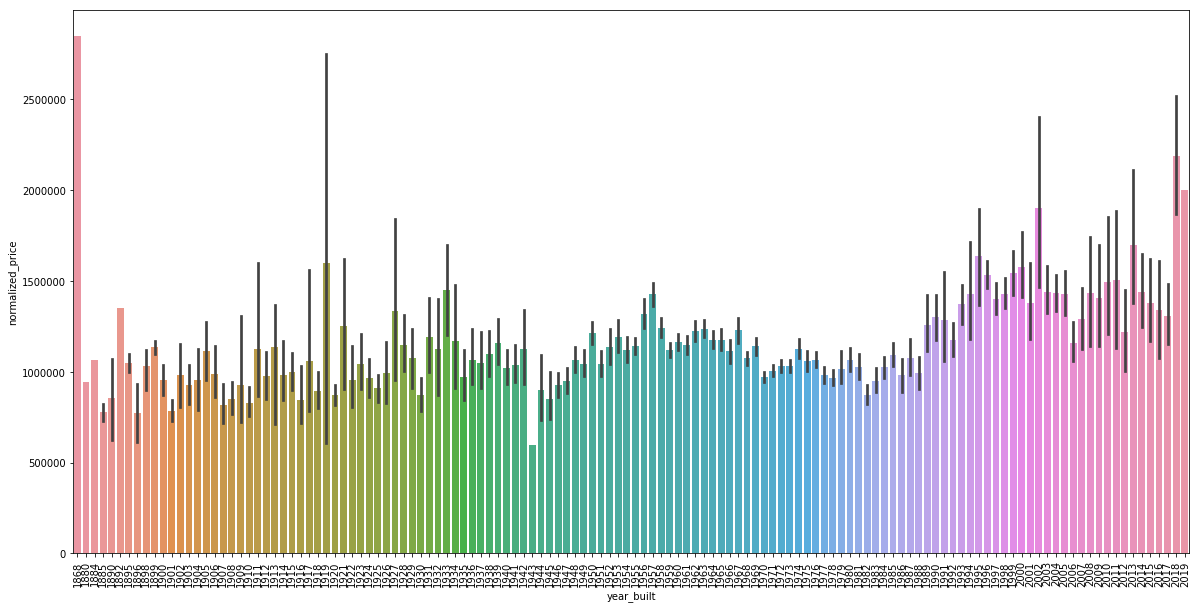

In [147]:
plt.figure(figsize=(20,10))
sns.barplot(final_data_single_family_sold.year_built,final_data_single_family_sold.normalized_price)
plt.xticks(rotation=90)


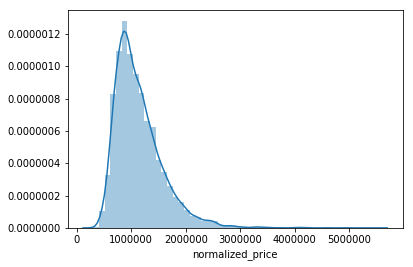

In [148]:
#SoldPrice
sns.distplot(final_data_single_family_sold['normalized_price'])

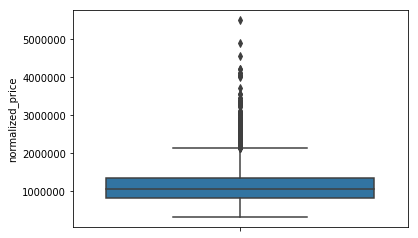

In [149]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_single_family_sold['normalized_price'])

In [150]:
final_data_single_family_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/final_data_single_family_sold.csv')